# Exercise 3: Exploratory Data Analysis
-------------------------------------

The task in this exercise is to perform an exploratory data analysis of the iris flower data set. This is one of the most commonly used classification data sets in statistics and machine learning literature. It was already used in the 1936 paper *The use of multiple measurements in taxonomic problems* by R. A. Fisher.

The data set available in Moodle was taken from the UCI Machine Learning Repository: [Link to Iris Data set](http://archive.ics.uci.edu/dataset/53/iris)

Download the data set from Moodle. The data set consists of two files:
- bezdekIris.data: contains the data
- iris.names: contains information about the data set

The iris data set contains measurement data of three different types of iris plants: iris setosa, iris versicolor and iris virginica. The measured features are the sepal length, sepal width, petal length and petal width of the flowers. The aim of the classification task is to distinguish the three iris types based on the given measurement data.

| iris setosa                                           | iris versicolor                                           | iris virginica                                           |
|-------------------------------------------------------|-----------------------------------------------------------|----------------------------------------------------------|
| <img src="iris_images/Iris_setosa.jpg" width="250" /> | <img src="iris_images/Iris_versicolor.jpg" width="250" /> | <img src="iris_images/Iris_virginica.jpg" width="250" /> |



------------------------

## Task 1: Load data
Load the data set into a *pandas* dataframe and inspect the data frame. How many instances does the data set contain? Is the number of instances per class balanced across the three different classes?

In [ ]:
import pandas as pd

iris = pd.read_csv('iris/bezdekIris.data', sep=',', header=None, names=['sepal length','sepal width','petal length','petal width', 'class'])

iris.head(5)


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# number of instances per class

print(iris['class'].value_counts())


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


The iris data set contains 150 instances. On the first look, there seem to be no missing values, all features contain exactly 150 non-null objects. The four features are given as floating-point values. The data set is balanced, there are exactly 50 samples from each iris type.

## Task 2: Descriptive Statistics

Calculate basic statistical properties of the four features. There are many built-in functions in *pandas* to calculate these properties. For example, you can use *pandas* *describe()* function. Plot the distributions of the features, e.g. using boxplots or histograms. What do you notice?

In [4]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

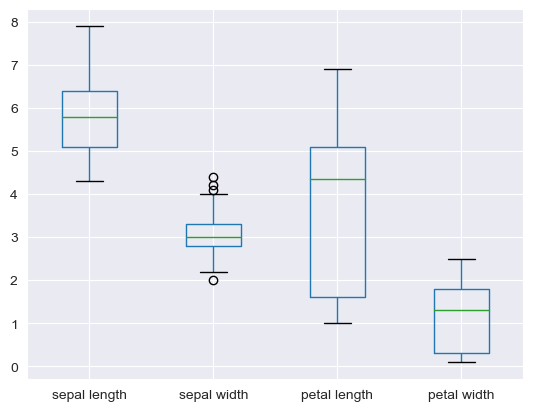

In [5]:
# boxplots of the four features

iris.boxplot(column=['sepal length', 'sepal width', 'petal length', 'petal width'])

C:\Users\schmidt\AppData\Local\Temp\ipykernel_39868\4260870163.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


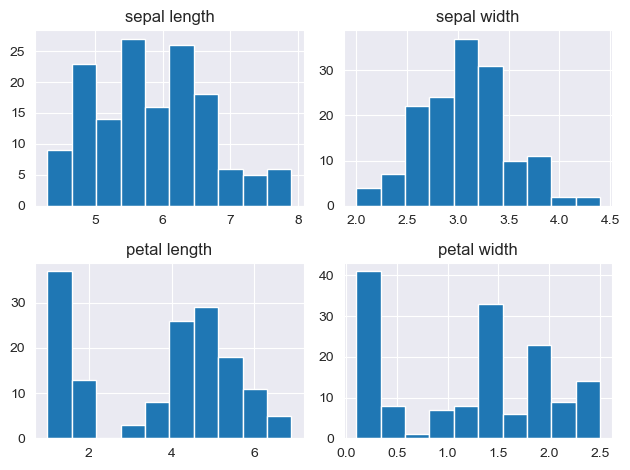

In [6]:
# histograms of the four features

import matplotlib.pyplot as plt

fig = plt.figure()
feature_number = 1
for param in iris.columns[0:4]:
    sbp = plt.subplot(2,2,feature_number)
    iris[param].hist()
    sbp.set_title(param)
    plt.tight_layout()
    feature_number+=1

plt.show()

In general, the sepals seem to be larger than the petals. Their length and width are on average higher. However, there are also overlaps. The boxplots show that the distributions of the four features are quite different. For example, the petal length has a much higher deviation than the sepal length. The sepal width on the other hand has a very low standard deviation, but there are outliers that fall outside the 1.5 interquartile range.

In the histograms, the same trends can be seen. It is visible that the features are not normally distributed. Only the sepal width feature seems to have a clear maximum in the center of the distribution while the other features have several separate maxima. The petal features in particular have a lot of values at the lower end of the distribution.

The feature distributions might indicate differences between the iris types which could lead to the formation of several maxima.

## Task 3: Class investigation

Take a further look into the feature distributions and examine how the distribution of data differs between the different classes iris setosa, iris versicolor and iris virginica.

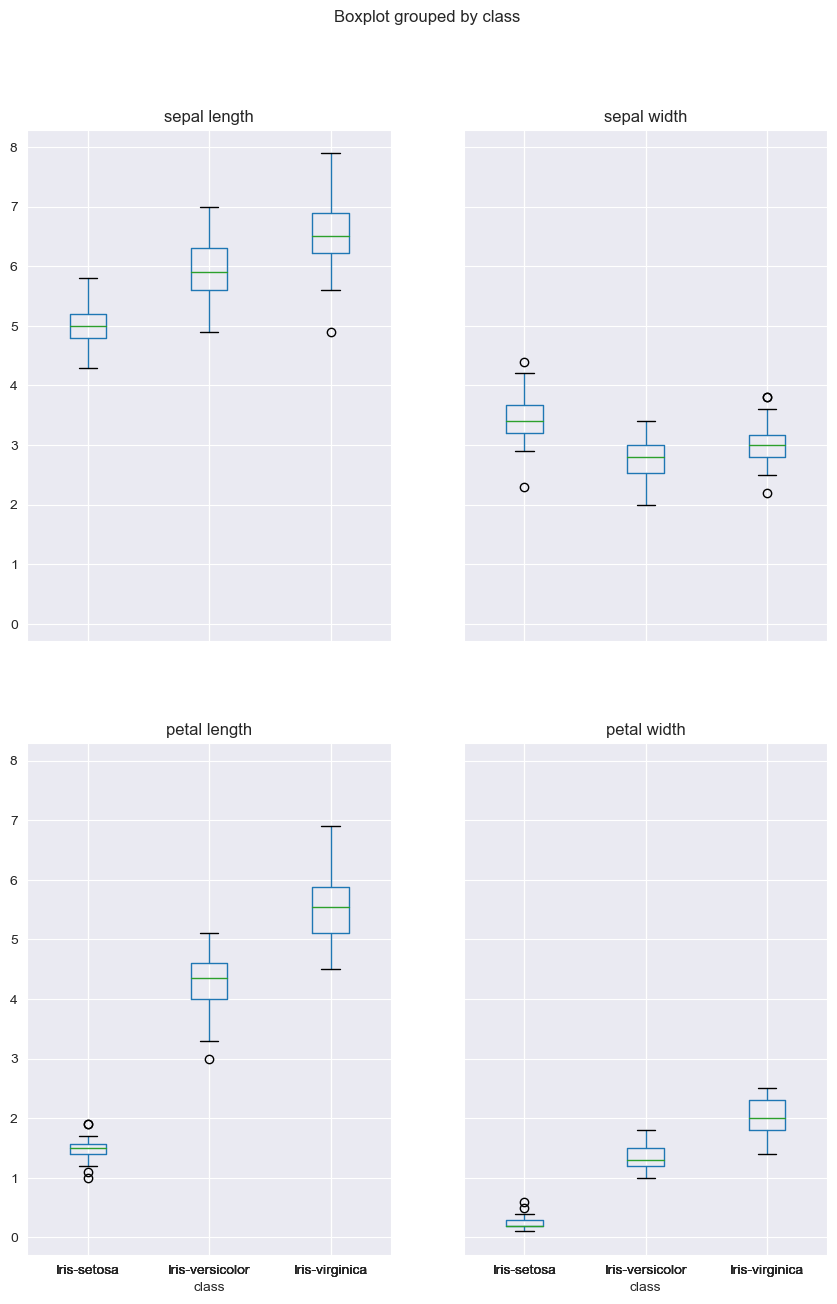

In [7]:
# boxplots grouped by iris type

iris.boxplot(column=['sepal length', 'sepal width', 'petal length', 'petal width'], by='class', figsize=[10,15])
plt.show()

C:\Users\schmidt\AppData\Local\Temp\ipykernel_39868\3705518424.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


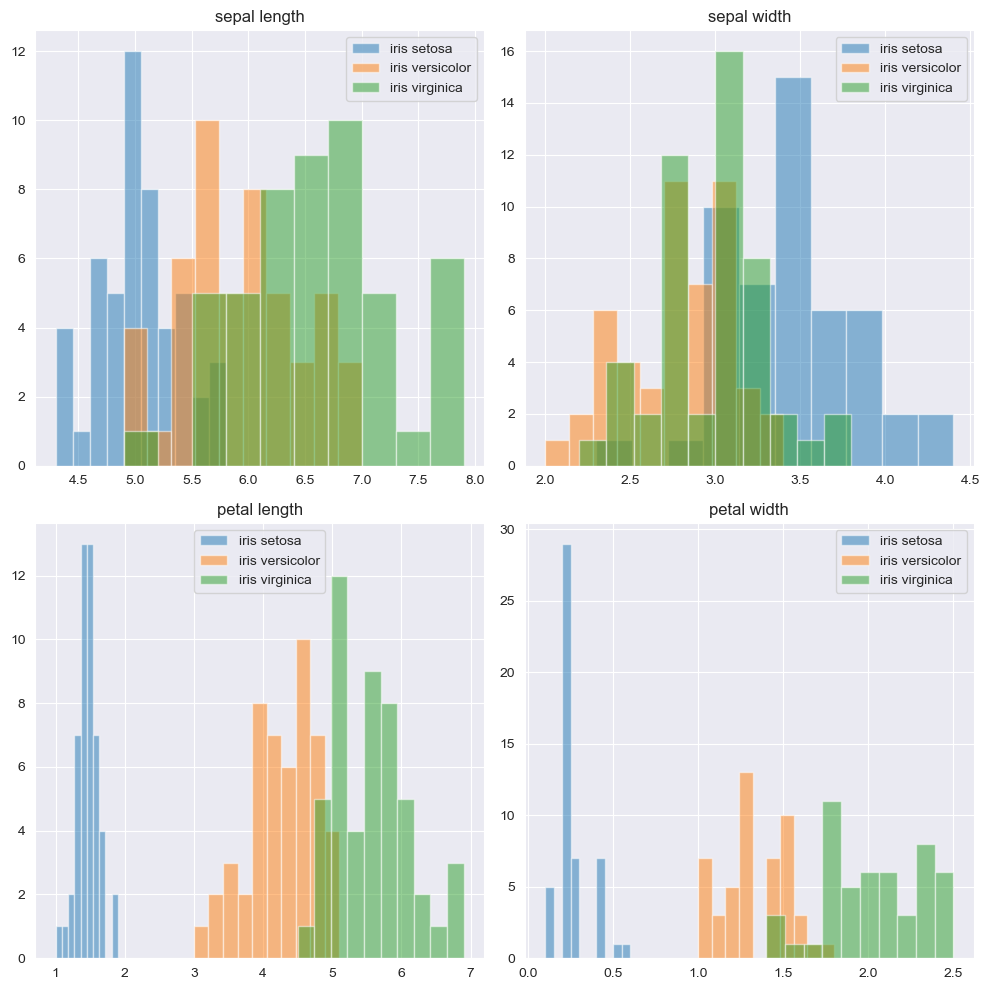

In [8]:
# histograms grouped by iris type

setosa = iris.loc[iris['class'] == 'Iris-setosa']
versicolor = iris.loc[iris['class'] == 'Iris-versicolor']
virginica = iris.loc[iris['class'] == 'Iris-virginica']

fig = plt.figure(figsize=[10,10])
feature_number = 1
for param in iris.columns[0:4]:
    sbp = plt.subplot(2,2,feature_number)
    plt.hist(setosa[param], alpha=0.5, label='iris setosa')
    plt.hist(versicolor[param], alpha=0.5, label='iris versicolor')
    plt.hist(virginica[param], alpha=0.5, label='iris virginica')
    sbp.set_title(param)
    plt.tight_layout()
    plt.legend()
    feature_number+=1

plt.show()

According to the plots, the features petal length and petal width seem the most promising for a classification. For both features, the values of iris setosa class are much smaller than those of the two other classes. The class can be clearly distinguished, there is no overlap to the instances of the other classes. This can be seen both in the boxplots and in the histograms. Additionally, these two attributes are larger for the iris virginica than for the iris versicolor plants. However, the difference between these two classes is not that clear and there is an overlap between the two classes. A classification solely based on one of those features can therefore not be 100% accurate.

The sepal length also shows the same characteristics: on average, the sepal length of iris setosa is the smallest, the sepal length of iris virginica the largest. In contrast to that, the values for the sepal width are highest for iris setosa. The sepal width feature shows the smallest differences between the classes and a classification based on this feature might be hard to achieve.

## Task 4: Correlation Analysis

In the next step, start to analyze the relationship between the different features. Do so by performing a correlation analysis and visualizing the relationship using pairplots. Pairplots can for example be created using the *seaborn* library. Which conclusions or hypotheses can be drawn from the analysis?

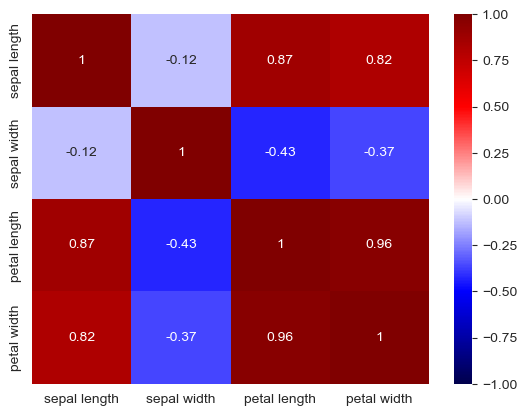

In [9]:
# correlation analysis

correlation = iris[['sepal length', 'sepal width', 'petal length', 'petal width']].corr(method='pearson')

import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap='seismic', annot=True)
plt.show()

C:\Users\schmidt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

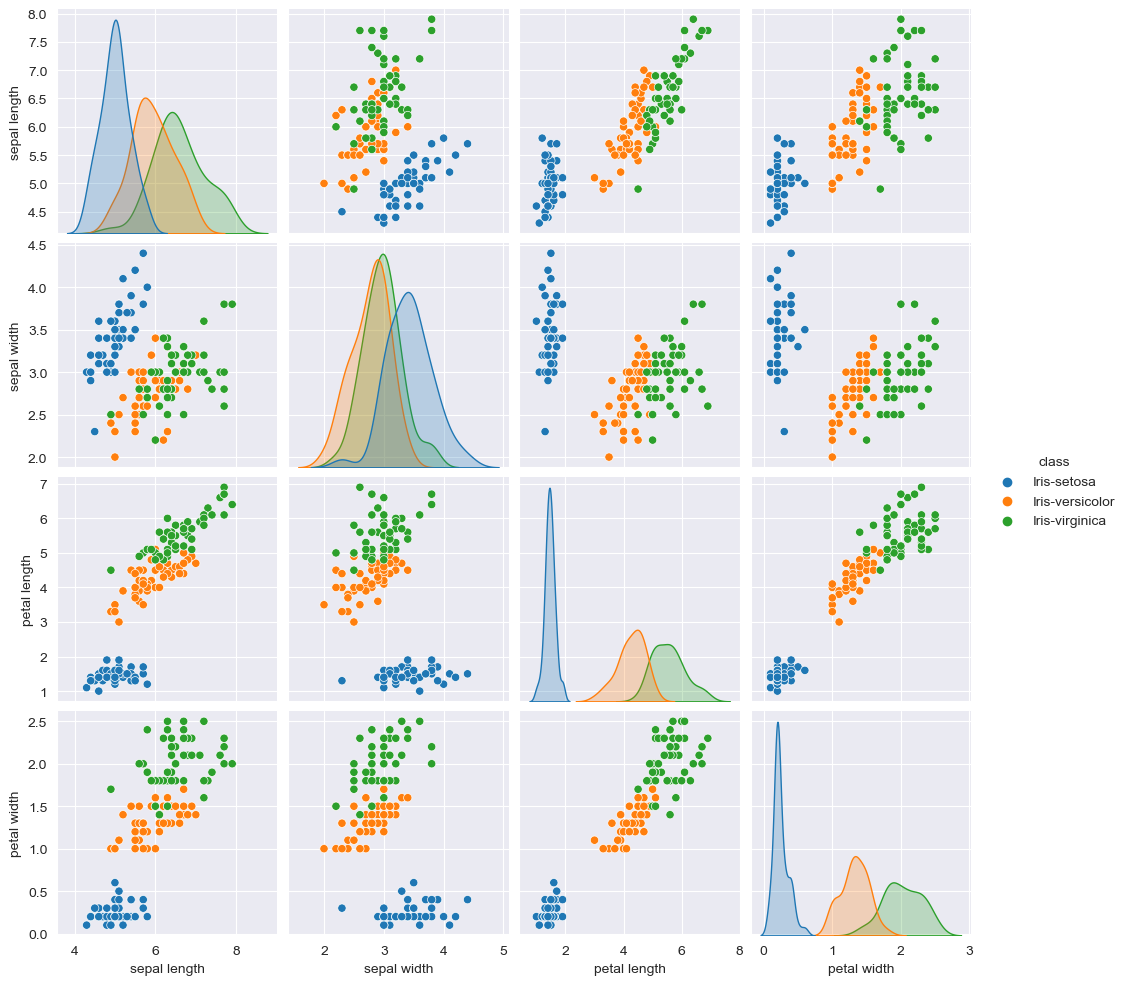

In [10]:
# pairplots

fig=plt.figure()
sns.pairplot(iris, hue='class')
plt.show()

The correlation between petal length and petal width is very high (pearson correlation coefficient = 0.96). This indicates that the information from the two features might be redundant, the petal width almost always increases linearly with the petal length.

There are also high positive correlations between the two petal features and the sepal length. Here, the relationship between the variables is not quite as linear, resulting in slightly lower correlation coefficients of 0.87 and 0.82. This is also visible in the pairplots of these features. The variation from a strictly linear relationship (pearson correlation coefficient = 1) is higher than for the petal width / petal length pairplot.

The correlation analysis shows only small negative correlations between the sepal width and the three other features, but the boxplots reveal some interesting insights. Apparently, the relation between the features depends on the iris type. For example, the pairplot of sepal width and sepal length reveals that there must be a high correlation between the two features for the iris setosa class. For the two other classes, this relation is less strong. Because of that, the total pearson correlation coefficient is close to 0 and this relation is not visible in the correlation analysis.

One can see that iris setosa can also be separated from the two other classes using the two sepal features together. A complete separation between iris virginica and iris versicolor does not seem to be possible using a combination of two features. This is an indicator that a completely accurate classification might not be possible.

## Task 5: Classification

Use a k-Nearest-Neighbor classifier to perform a classification on the Iris data set. Choose an appropriate value for k. Compare the predicted results with the true values and evaluate the results using a confusion matrix. Are the results as expected based on the exploratory data analysis?

In this task, you do not have to optimize the classifier using separate training and test sets. You can use the whole data set for training. The goal is simply to learn a classifier and get a first impression of how good the classification works.

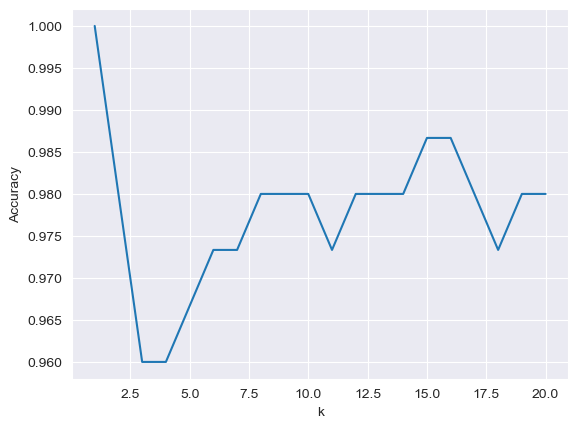

In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = iris['class']

# try different values for k and plot the accuracy score
k = np.linspace(1,20, dtype=int)

acc = []
# loop for training and evaluating the classifier
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i).fit(x,y)
    y_pred = knn.predict(x)
    acc.append(accuracy_score(y, y_pred))

plt.figure()
plt.plot(k,acc)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


For k=1 the accuracy is of course 100%, but this is shear overfitting, as for this k the label for each instance is only predicted based on its own label. When k is increasing, the accuracy score remains quite high. One can see that small values for k perform a bit worse than high values. All values for k starting with values higher than k=6 seem to lead to good results with only some small fluctuations in the accuracy score.

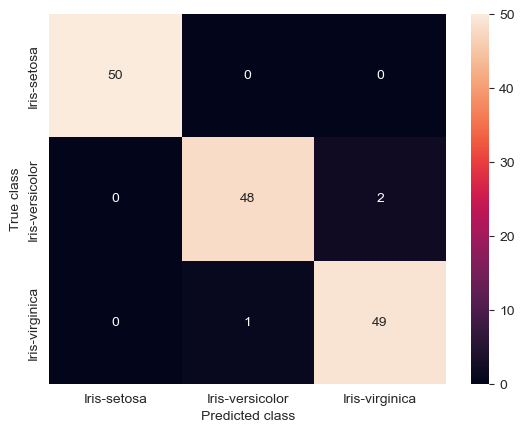

In [12]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix

# we choose k=9
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x,y)

y_pred = knn_model.predict(x)

cf = confusion_matrix(y, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

sns.heatmap(cf, annot=True, xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

The results in the confusion matrix show that all of the iris setosa samples are classified correctly. This is no surprise, since we already saw in the different visualizations of the data that they can be easily separated from the other two classes. The classification between iris versicolor and iris virginica also works very good, but there a few misclassified examples. Again, this is exactly what one could have expected after the exploratory data analysis.